In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 14.1.0


# TDM MIMO FMCW Radar: Time-Division Multiplexing for Virtual Arrays

## Introduction

This notebook demonstrates **TDM MIMO FMCW radar**—a sophisticated technique that combines Time-Division Multiplexing (TDM) with MIMO (Multiple-Input Multiple-Output) and FMCW (Frequency-Modulated Continuous Wave) principles to create large virtual antenna arrays with fewer physical elements. This technology is fundamental to modern automotive radar systems, enabling high-resolution angle estimation for autonomous driving.

### What is TDM MIMO FMCW Radar?

**Core Concept:**

TDM MIMO radar transmits from multiple TX antennas **sequentially** (time-division) rather than simultaneously. Each TX channel is active during a different time slot, and the receiver captures the returns separately. This creates a **virtual array** that combines TX and RX positions.

**Virtual Array Formation:**

$$N_{virtual} = N_{TX} \times N_{RX}$$

For example:
- 4 TX antennas + 8 RX antennas = **32 virtual elements**
- Physical elements: 4 + 8 = 12
- Virtual aperture: **2.67× larger** than physical

This dramatically improves angular resolution without proportionally increasing hardware complexity.

### TDM Principle

**Time-Division Multiplexing:**

Instead of all TX antennas transmitting simultaneously:

1. **TX1** transmits chirp during time slot 0-100 μs
2. **TX2** transmits chirp during time slot 100-200 μs
3. **TX3** transmits chirp during time slot 200-300 μs
4. **TX4** transmits chirp during time slot 300-400 μs

Each RX antenna captures all four time slots separately, creating **TX×RX unique channels**.

**Key Parameter: `delay`**

The `delay` parameter in RadarSimPy controls time offset between TX channels:
- TX1: `delay = 0 μs`
- TX2: `delay = 100 μs`
- TX3: `delay = 200 μs`
- TX4: `delay = 300 μs`

**Pulse Repetition Period (PRP):**

Must be long enough to accommodate all TX time slots:

$$PRP \geq N_{TX} \times (T_{chirp} + T_{guard})$$

For this example: $PRP = 400$ μs accommodates 4 × 100 μs slots.

### MIMO Radar Principles

**Why MIMO?**

Traditional phased array radar uses a single TX and multiple RX antennas. MIMO uses multiple TX and RX, providing:

1. **Virtual Aperture**: Larger effective antenna array
2. **Angular Resolution**: Better angle estimation (narrower beamwidth)
3. **Degrees of Freedom**: More spatial diversity
4. **Hardware Efficiency**: Fewer physical elements for same performance

**Virtual Array Geometry:**

For each TX-RX pair, the **virtual element location** is:

$$\vec{v}_{ij} = \vec{t}_i + \vec{r}_j$$

Where:
- $\vec{v}_{ij}$ = Virtual element position
- $\vec{t}_i$ = TX antenna position
- $\vec{r}_j$ = RX antenna position

This creates a virtual array with unique spatial sampling.

### Angular Resolution

**Beamwidth:**

Angular resolution (3 dB beamwidth) is approximately:

$$\theta_{3dB} \approx \frac{\lambda}{L}$$

Where:
- $\lambda$ = Wavelength
- $L$ = Virtual aperture length

**For This Example:**

- Wavelength: $\lambda = \frac{c}{f} = \frac{3×10^8}{24.125×10^9} \approx 12.4$ mm
- Virtual aperture: ~12λ (TX) + 4λ (RX) = **16λ effective**
- Angular resolution: ~3.6° (compared to ~14° with single TX)

### TDM vs. Other MIMO Schemes

**TDM (Time-Division Multiplexing):**
- **Pros**: Simple, no TX interference, full TX power per slot
- **Cons**: Slower update rate, Doppler complications
- **Use**: Automotive radar (stationary/slow targets)

**FDM (Frequency-Division Multiplexing):**
- **Pros**: Simultaneous TX, faster update
- **Cons**: Split bandwidth, complex waveforms
- **Use**: High-speed scenarios

**CDM (Code-Division Multiplexing):**
- **Pros**: Simultaneous TX, interference robust
- **Cons**: Complex codes, cross-talk
- **Use**: Communications-inspired radar

**DDM (Doppler-Division Multiplexing):**
- **Pros**: Natural Doppler separation
- **Cons**: Limited to specific velocity bins
- **Use**: Fast-moving targets

### FMCW Integration

**Why FMCW for MIMO?**

FMCW is ideal for automotive TDM MIMO because:

1. **Continuous transmission**: Natural fit for time-division
2. **Range-Doppler processing**: 2D FFT for range and velocity
3. **Low peak power**: Eye-safety compliance
4. **Compact hardware**: No high-power pulsed components

**Combined Processing:**

1. **Range FFT**: Extract range profile from chirp
2. **Virtual array formation**: Stack TDM channels
3. **Digital beamforming**: Extract angle via spatial FFT or beamforming

### Digital Beamforming

**Steering Vector:**

For angle $\theta$, the steering vector is:

$$\vec{a}(\theta) = [e^{j2\pi d_1 \sin\theta/\lambda}, e^{j2\pi d_2 \sin\theta/\lambda}, ..., e^{j2\pi d_N \sin\theta/\lambda}]^T$$

Where $d_i$ is the position of the $i$-th virtual element.

**Beamformer Output:**

$$y(\theta) = \vec{w}^H \vec{a}(\theta) \vec{x}$$

Where:
- $\vec{w}$ = Window weights (e.g., Chebyshev for sidelobe control)
- $\vec{x}$ = Virtual array data from range bin

**Angle Estimation:**

Sweep $\theta$ from -90° to +90° to form angle profile or range-angle map.

### Automotive Radar Applications

**Autonomous Driving:**

TDM MIMO FMCW radar provides:
- **Long range**: 200+ meters
- **High angular resolution**: Distinguish lane markers, vehicles
- **Velocity measurement**: Doppler processing
- **Multi-target tracking**: Separate closely-spaced objects

**Key Scenarios:**
- Highway driving (detect vehicles in adjacent lanes)
- Urban navigation (pedestrians, cyclists)
- Parking assistance (precise angle for tight spaces)
- Cross-traffic detection

**Typical Automotive Configuration:**
- 3-4 TX antennas
- 4-8 RX antennas
- 12-32 virtual channels
- 77 GHz carrier frequency
- Angular resolution: 1-5°

### System Parameters

**This Example:**

- **Carrier**: 24.125 GHz (ISM band)
- **Bandwidth**: 100 MHz (24.075-24.175 GHz)
- **Chirp Duration**: 80 μs
- **PRP**: 400 μs (accommodates 4 TX slots)
- **TX Array**: 4 elements, 2λ spacing
- **RX Array**: 8 elements, λ/2 spacing
- **Virtual Array**: 32 elements
- **TX Power**: 15 dBm per channel
- **Sampling Rate**: 2 MHz

### You'll Learn How To:

- Understand TDM MIMO virtual array formation
- Configure TX channel delays for time-division multiplexing
- Set appropriate PRP to accommodate all TX time slots
- Design TX array with wide spacing (2λ) and RX array with dense spacing (λ/2)
- Calculate virtual array geometry from TX-RX combinations
- Simulate 3 targets at different ranges and angles
- Extract range profiles from FMCW beat signals
- Form virtual array by stacking TDM channels
- Apply digital beamforming with Chebyshev windowing
- Generate range-angle maps showing target positions
- Achieve high angular resolution (3-4°) from 12 physical elements
- Understand automotive radar MIMO principles

### About This Example

This notebook uses [`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) to demonstrate:

**Radar Configuration:**
- 24.125 GHz (K-band) TDM MIMO FMCW
- 4 TX × 8 RX = 32 virtual channels
- Time-division multiplexing with 100 μs slots
- Digital beamforming for angle estimation

**Targets:**
- Target 1: 160m range, 0° azimuth, 25 dBsm
- Target 2: 80m range, -45° azimuth, 20 dBsm
- Target 3: 30m range, +34° azimuth, 8 dBsm

**Processing:**
- Range FFT for each virtual channel
- Virtual array formation from TDM channels
- Digital beamforming across virtual aperture
- Range-angle map generation

**Expected Results:**
- Three distinct targets in range-angle space
- High angular resolution separating closely-spaced targets
- Demonstration of virtual array advantage

The simulation showcases TDM MIMO FMCW radar's capability for high-resolution imaging with efficient hardware utilization—a cornerstone technology for modern automotive radar.

## Radar System Configuration

Configure TDM MIMO FMCW radar with virtual array formation.

### Import Required Modules

Import necessary modules for radar simulation and visualization.

In [2]:
# Import necessary modules for radar simulation
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

### MIMO Array Configuration

Define TX and RX antenna arrays for virtual array formation through TDM.

**TX Array Design:**

The transmitter array consists of **4 antenna elements** with **2λ spacing**:
- Wide spacing provides **large aperture** (12λ baseline)
- Creates spatial diversity for virtual array
- Positioned at: -12λ, -8λ, -4λ, 0λ along Y-axis

**TX Antenna Pattern:**

- Pattern: $\cos(\theta)$ (broad coverage)
- Gain: 6 dB
- Coverage: ~±60° @ -3dB

**TDM Configuration via `delay` Parameter:**

Each TX channel transmits during a different time slot:

- **TX Channel 1**: `delay = 0 μs` (0-80 μs)
- **TX Channel 2**: `delay = 100 μs` (100-180 μs)
- **TX Channel 3**: `delay = 200 μs` (200-280 μs)
- **TX Channel 4**: `delay = 300 μs` (300-380 μs)

The `delay` parameter controls the time offset, enabling sequential transmission without interference.

**PRP Requirement:**

With 80 μs chirps and time slots, PRP must be:

$$PRP \geq 4 \times 100\text{ μs} = 400\text{ μs}$$

This ensures all TX channels fit within one repetition period.

In [3]:
# Calculate wavelength at carrier frequency
wavelength = 3e8 / 24.125e9  # λ ≈ 12.4 mm

### Define Antenna Pattern ###

# Angular coverage: -90° to +90° in 1° steps
angle = np.arange(-90, 91, 1)

# Cosine pattern with 6 dB gain (broad beam for wide coverage)
pattern = 20 * np.log10(np.cos(angle / 180 * np.pi) + 0.01) + 6  # dB

### Configure TX Array (4 elements, 2λ spacing, TDM) ###

# TX Channel 1: Position -12λ, delay 0 μs (first time slot)
tx_channel_1 = dict(
    location=(0, -12 * wavelength, 0),   # Y-position: -12λ (leftmost)
    azimuth_angle=angle,                  # Azimuth angles
    azimuth_pattern=pattern,              # Azimuth gain pattern (dB)
    elevation_angle=angle,                # Elevation angles
    elevation_pattern=pattern,            # Elevation gain pattern (dB)
    delay=0,                              # TDM time slot: 0 μs (transmits first)
)

# TX Channel 2: Position -8λ, delay 100 μs (second time slot)
tx_channel_2 = dict(
    location=(0, -8 * wavelength, 0),     # Y-position: -8λ
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
    delay=100e-6,                         # TDM time slot: 100 μs (transmits second)
)

# TX Channel 3: Position -4λ, delay 200 μs (third time slot)
tx_channel_3 = dict(
    location=(0, -4 * wavelength, 0),     # Y-position: -4λ
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
    delay=200e-6,                         # TDM time slot: 200 μs (transmits third)
)

# TX Channel 4: Position 0, delay 300 μs (fourth time slot)
tx_channel_4 = dict(
    location=(0, 0, 0),                   # Y-position: 0 (rightmost)
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
    delay=300e-6,                         # TDM time slot: 300 μs (transmits fourth)
)

### Create FMCW Transmitter with TDM ###

tx = Transmitter(
    f=[24.075e9, 24.175e9],  # FMCW chirp: 24.075-24.175 GHz (100 MHz bandwidth)
    t=80e-6,                  # Chirp duration: 80 μs
    tx_power=15,              # Transmit power: 15 dBm per channel
    prp=400e-6,               # Pulse repetition period: 400 μs (accommodates 4 TX slots)
    pulses=1,                 # Number of pulses: 1 (single chirp per TX)
    channels=[tx_channel_1, tx_channel_2, tx_channel_3, tx_channel_4],  # 4 TX channels
)

print(f"TX Array Configuration:")
print(f"  Number of TX elements: 4")
print(f"  TX spacing: 2λ = {2*wavelength*1000:.2f} mm")
print(f"  TX aperture: 12λ = {12*wavelength*1000:.1f} mm")
print(f"  TDM time slots: 0, 100, 200, 300 μs")
print(f"  Chirp bandwidth: 100 MHz")
print(f"  PRP: 400 μs")

TX Array Configuration:
  Number of TX elements: 4
  TX spacing: 2λ = 24.87 mm
  TX aperture: 12λ = 149.2 mm
  TDM time slots: 0, 100, 200, 300 μs
  Chirp bandwidth: 100 MHz
  PRP: 400 μs


### Receiver Array Configuration

Define RX antenna array with dense spacing for virtual array formation.

**RX Array Design:**

The receiver array consists of **8 antenna elements** with **λ/2 spacing**:
- Dense spacing provides **uniform sampling** of virtual array
- Positioned at: 0, λ/2, λ, 1.5λ, 2λ, 2.5λ, 3λ, 3.5λ along Y-axis
- Total RX aperture: 3.5λ

**RX Antenna Pattern:**

- Pattern: $\cos(\theta)$ (same as TX)
- Gain: 6 dB
- Coverage: ~±60° @ -3dB

**Receiver Parameters:**

- **Sampling Rate**: 2 MHz (sufficient for 100 MHz bandwidth)
- **Noise Figure**: 8 dB (good performance)
- **RF Gain**: 20 dB (LNA)
- **Baseband Gain**: 50 dB (total: 70 dB)
- **Load Resistor**: 500 Ω

**Virtual Array Formation:**

With 4 TX and 8 RX, the virtual array has:

$$N_{virtual} = 4 \times 8 = 32 \text{ elements}$$

Each TX-RX pair creates a unique virtual element at position: $\vec{v}_{ij} = \vec{t}_i + \vec{r}_j$

In [4]:
### Configure RX Array (8 elements, λ/2 spacing) ###

# Create list of RX channels with uniform spacing
channels = []
for idx in range(0, 8):
    channels.append(
        dict(
            location=(0, wavelength / 2 * idx, 0),  # Y-position: 0, λ/2, λ, 1.5λ, ..., 3.5λ
            azimuth_angle=angle,                    # Same azimuth pattern as TX
            azimuth_pattern=pattern,                # Same gain pattern (6 dB)
            elevation_angle=angle,
            elevation_pattern=pattern,
        )
    )

### Create FMCW Receiver ###

rx = Receiver(
    fs=2e6,              # Sampling rate: 2 MHz (Nyquist for baseband)
    noise_figure=8,      # Noise figure: 8 dB
    rf_gain=20,          # RF gain: 20 dB (LNA)
    baseband_gain=50,    # Baseband gain: 50 dB
    load_resistor=500,   # Load resistance: 500 Ω
    channels=channels,   # 8 RX channels
)

print(f"\nRX Array Configuration:")
print(f"  Number of RX elements: 8")
print(f"  RX spacing: λ/2 = {wavelength/2*1000:.2f} mm")
print(f"  RX aperture: 3.5λ = {3.5*wavelength*1000:.1f} mm")
print(f"\nVirtual Array:")
print(f"  Virtual elements: 4 TX × 8 RX = 32")
print(f"  Physical elements: 4 + 8 = 12")
print(f"  Array efficiency: {32/12:.2f}× (virtual/physical)")


RX Array Configuration:
  Number of RX elements: 8
  RX spacing: λ/2 = 6.22 mm
  RX aperture: 3.5λ = 43.5 mm

Virtual Array:
  Virtual elements: 4 TX × 8 RX = 32
  Physical elements: 4 + 8 = 12
  Array efficiency: 2.67× (virtual/physical)


### Create Radar System

Combine transmitter and receiver to form the complete TDM MIMO FMCW radar.

In [5]:
# Create complete TDM MIMO FMCW radar system
radar = Radar(transmitter=tx, receiver=rx)

## Target Configuration

Define three targets at different ranges and angles to demonstrate angular resolution.

### Target Parameters

**Target Placement Strategy:**

Three targets positioned to demonstrate TDM MIMO angular resolution capability:

**Target 1 (Far, On-Axis):**
- **Location**: (160, 0, 0) m → 160m range, 0° azimuth
- **Velocity**: (0, 0, 0) m/s → Stationary
- **RCS**: 25 dBsm → Large target (truck/bus)
- **Phase**: 0°

**Target 2 (Medium, Left):**
- **Location**: (80, -80, 0) m → 113m range, -45° azimuth
- **Velocity**: (0, 0, 0) m/s → Stationary
- **RCS**: 20 dBsm → Medium target (car)
- **Phase**: 0°
- **Calculation**: $R = \sqrt{80^2 + 80^2} = 113$ m, $\theta = \arctan(-80/80) = -45°$

**Target 3 (Near, Right):**
- **Location**: (30, 20, 0) m → 36m range, +34° azimuth
- **Velocity**: (0, 0, 0) m/s → Stationary
- **RCS**: 8 dBsm → Small target (motorcycle)
- **Phase**: 0°
- **Calculation**: $R = \sqrt{30^2 + 20^2} = 36$ m, $\theta = \arctan(20/30) = 34°$

**Angular Separation:**

- Target 1 to Target 2: 45° separation
- Target 2 to Target 3: 79° separation
- Target 1 to Target 3: 34° separation

All separations are much larger than the ~3-4° angular resolution, ensuring clear distinction in the range-angle map.

In [6]:
# Configure Target 1: Far range, on-axis (0°)
target_1 = dict(
    location=(160, 0, 0),   # Position: 160m range, 0° azimuth
    speed=(0, 0, 0),        # Velocity: stationary
    rcs=25,                 # Radar cross section: 25 dBsm (large vehicle)
    phase=0,                # Initial phase: 0 degrees
)

# Configure Target 2: Medium range, left side (-45°)
target_2 = dict(
    location=(80, -80, 0),  # Position: 113m range, -45° azimuth
    speed=(0, 0, 0),        # Velocity: stationary
    rcs=20,                 # Radar cross section: 20 dBsm (medium vehicle)
    phase=0,                # Initial phase: 0 degrees
)

# Configure Target 3: Near range, right side (+34°)
target_3 = dict(
    location=(30, 20, 0),   # Position: 36m range, +34° azimuth
    speed=(0, 0, 0),        # Velocity: stationary
    rcs=8,                  # Radar cross section: 8 dBsm (small target)
    phase=0,                # Initial phase: 0 degrees
)

# Combine targets for simulation
targets = [target_1, target_2, target_3]

## Simulate Baseband Signals

Generate TDM MIMO FMCW radar baseband signals with sequential TX transmission.

### Simulation Process

The simulator performs:
1. **TDM Transmission**: 4 TX channels transmit sequentially
2. **Chirp Generation**: FMCW chirp from 24.075-24.175 GHz
3. **Propagation**: Calculate delays to each target
4. **Reflection**: Apply RCS and antenna patterns
5. **Reception**: Down-convert to baseband I/Q for each RX
6. **Noise**: Add thermal noise from receiver

**Output Data Structure:**

- **Dimensions**: [channels, pulses, samples]
  - Channels: 32 (4 TX × 8 RX virtual array)
  - Pulses: 1
  - Samples: ~160 per chirp (2 MHz × 80 μs)

**TDM Channel Organization:**

The 32 channels are organized as:
- Channels 0-7: TX1 × RX1-8
- Channels 8-15: TX2 × RX1-8
- Channels 16-23: TX3 × RX1-8
- Channels 24-31: TX4 × RX1-8

In [7]:
# Import radar simulator
from radarsimpy.simulator import sim_radar

# Simulate TDM MIMO FMCW radar with three targets
data = sim_radar(radar, targets)

# Extract simulation results
timestamp = data["timestamp"]              # Time array [32, 1, samples]
baseband = data["baseband"] + data["noise"]  # Complex I/Q + noise [32, 1, samples]

print(f"\nSimulation complete:")
print(f"  Baseband shape: {baseband.shape}")
print(f"  Virtual channels: {baseband.shape[0]}")
print(f"  Samples per chirp: {baseband.shape[2]}")


Simulation complete:
  Baseband shape: (32, 1, 160)
  Virtual channels: 32
  Samples per chirp: 160


### Visualize TDM Chirps

Display frequency-time diagram showing sequential TX transmission.

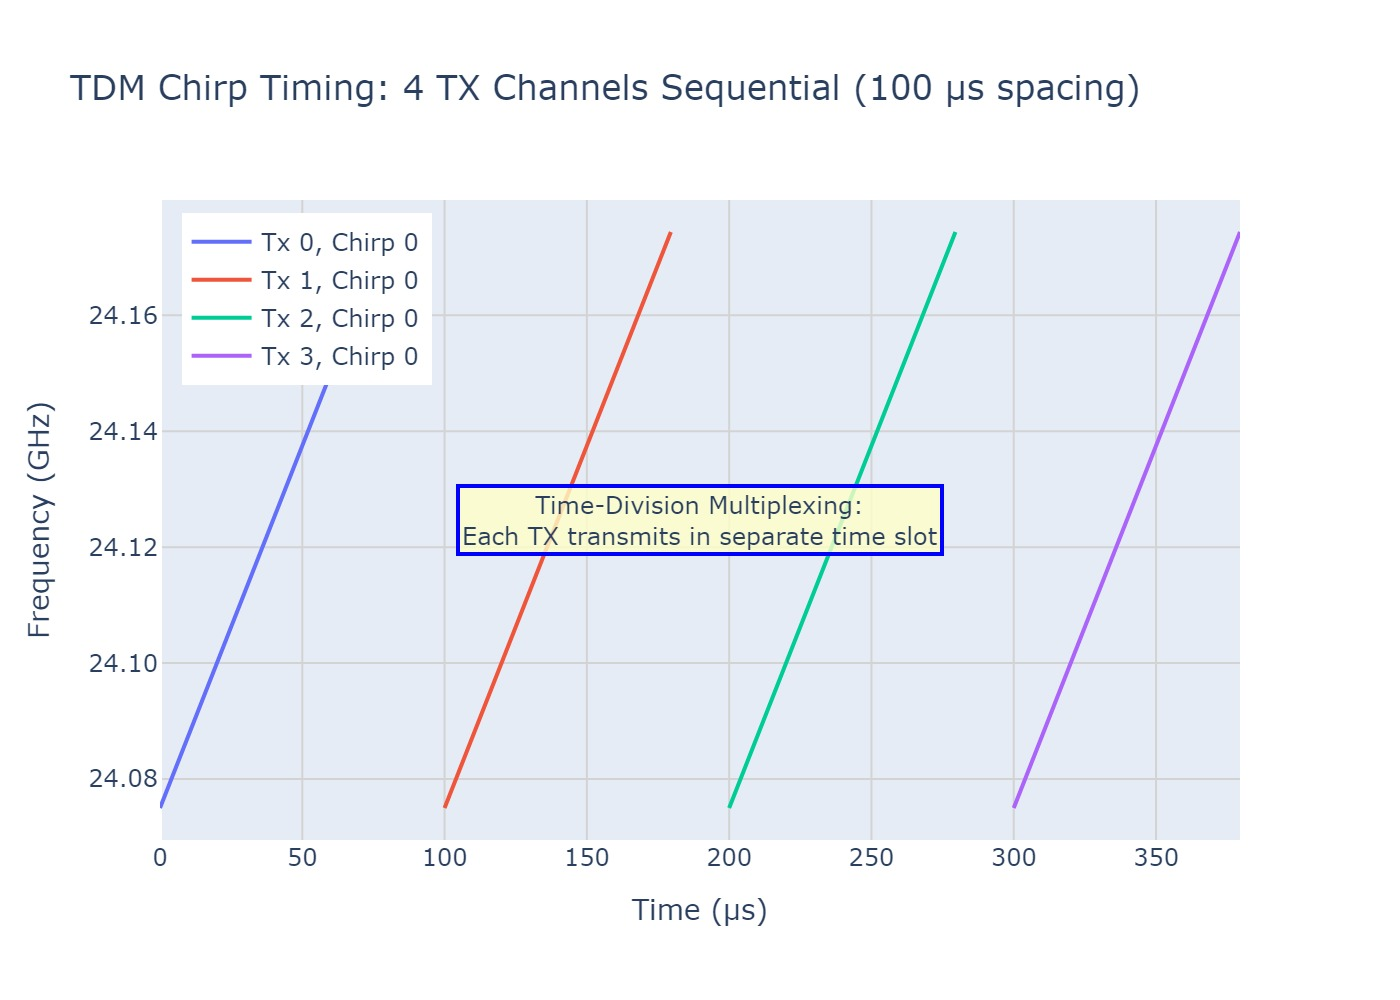

In [8]:
# Import plotting libraries
import plotly.graph_objs as go
from IPython.display import Image

# Create figure for TDM chirp visualization
fig = go.Figure()

# Plot chirps for each TX channel (first RX of each TX group)
for idx in range(0, 1):                    # Single pulse
    for ch_idx in range(0, 32, 8):         # TX1=0, TX2=8, TX3=16, TX4=24 (first RX of each)
        # Create frequency ramp for FMCW chirp
        freq_ramp = np.linspace(
            24.125e9 - radar.radar_prop["transmitter"].waveform_prop["bandwidth"] / 2,  # Start: 24.075 GHz
            24.125e9 + radar.radar_prop["transmitter"].waveform_prop["bandwidth"] / 2,  # End: 24.175 GHz
            radar.sample_prop["samples_per_pulse"],                                     # Number of samples
            endpoint=False,
        ) / 1e9  # Convert to GHz
        
        fig.add_trace(
            go.Scatter(
                x=timestamp[ch_idx, idx, :] * 1e6,  # Time in microseconds
                y=freq_ramp,                         # Frequency in GHz
                name="Tx " + str(int(ch_idx / 8)) + ", Chirp " + str(idx),
                line=dict(width=2),
            )
        )

# Configure plot layout
fig.update_layout(
    title="TDM Chirp Timing: 4 TX Channels Sequential (100 μs spacing)",
    yaxis=dict(tickformat=".2f", title="Frequency (GHz)", gridcolor='lightgray'),
    xaxis=dict(tickformat=".0f", title="Time (μs)", gridcolor='lightgray'),
    height=500,
    legend=dict(x=0.02, y=0.98),
)

# Add annotation explaining TDM
fig.add_annotation(
    text="Time-Division Multiplexing:<br>Each TX transmits in separate time slot",
    xref="paper", yref="paper",
    x=0.5, y=0.5,
    showarrow=False,
    bgcolor="rgba(255,255,200,0.8)",
    bordercolor="blue",
    borderwidth=2,
    font=dict(size=12),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Visualize Beat Signal

Display time-domain I/Q beat signal from first virtual channel (TX1-RX1).

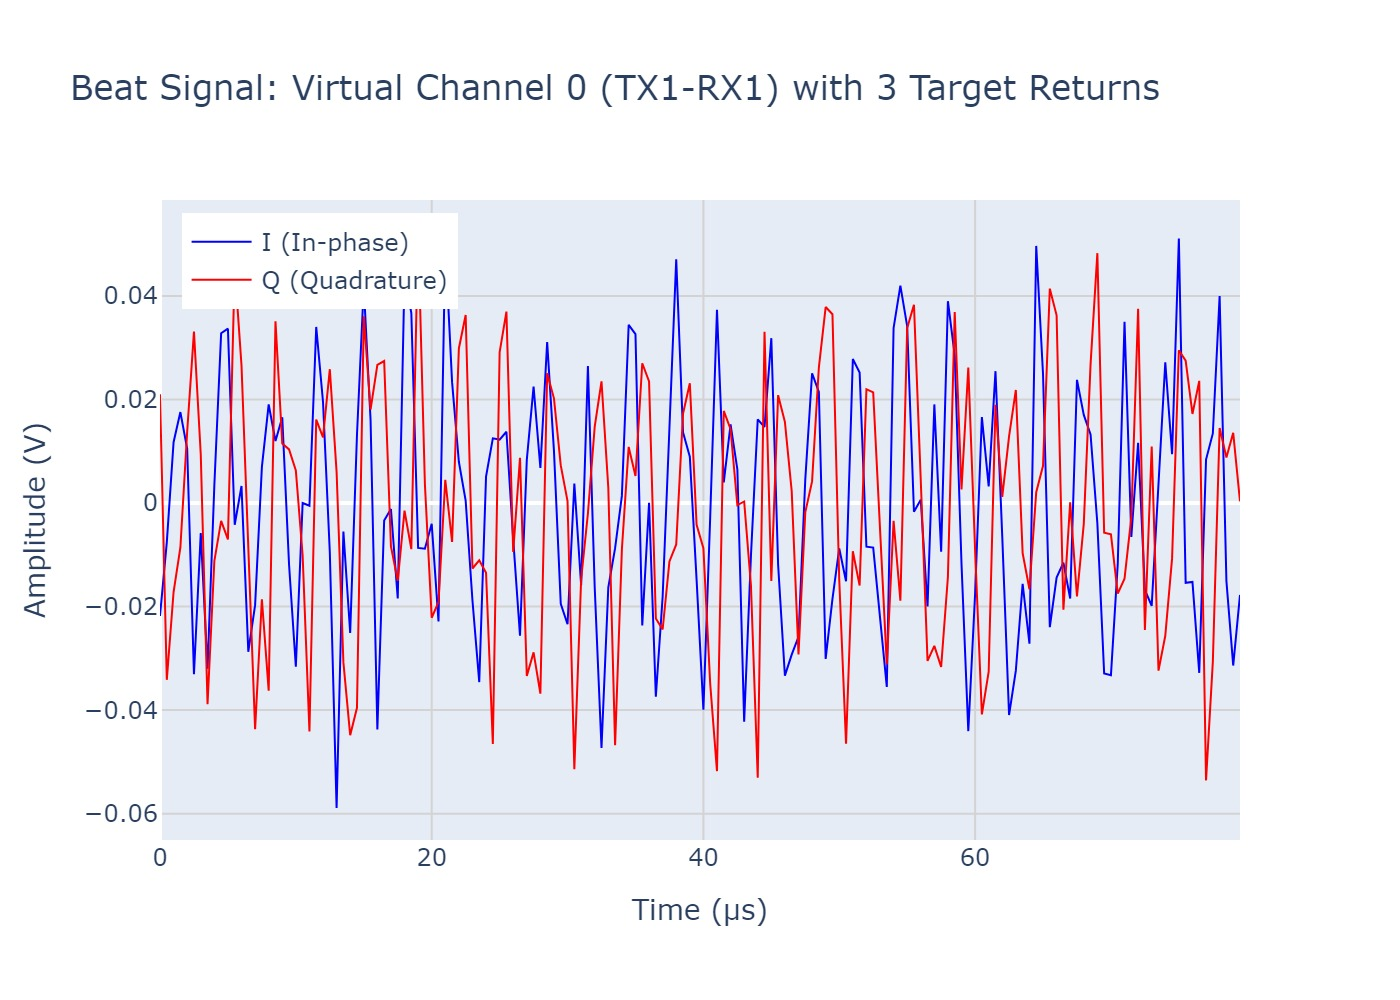

In [9]:
# Create figure for beat signal visualization
fig = go.Figure()

# Plot In-phase (I) component
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :] * 1e6,      # Time in microseconds
        y=np.real(baseband[0, 0, :]),    # Real part (I channel)
        name="I (In-phase)",
        line=dict(color='blue', width=1),
    )
)

# Plot Quadrature (Q) component
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :] * 1e6,      # Time in microseconds
        y=np.imag(baseband[0, 0, :]),    # Imaginary part (Q channel)
        name="Q (Quadrature)",
        line=dict(color='red', width=1),
    )
)

# Configure plot layout
fig.update_layout(
    title="Beat Signal: Virtual Channel 0 (TX1-RX1) with 3 Target Returns",
    yaxis=dict(title="Amplitude (V)", gridcolor='lightgray'),
    xaxis=dict(title="Time (μs)", gridcolor='lightgray'),
    height=500,
    legend=dict(x=0.02, y=0.98),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Radar Signal Processing

Apply range FFT and digital beamforming to extract target range and angle.

### Range Profile Extraction

**Range FFT Processing:**

For FMCW radar, target range is encoded as **beat frequency**:

$$f_b = \frac{2BR}{cT}$$

Where:
- $f_b$ = Beat frequency (Hz)
- $B$ = Chirp bandwidth (100 MHz)
- $R$ = Target range (m)
- $c$ = Speed of light
- $T$ = Chirp duration (80 μs)

**FFT Conversion:**

Apply FFT to beat signal to extract range profile:

$$R = \frac{f_b \cdot c \cdot T}{2B}$$

**Windowing:**

Chebyshev window with 60 dB sidelobe suppression reduces range sidelobes while maintaining reasonable mainlobe width.

In [10]:
# Import signal processing modules
from scipy import signal
import radarsimpy.processing as proc

# Create Chebyshev window for range FFT (60 dB sidelobe suppression)
range_window = signal.windows.chebwin(radar.sample_prop["samples_per_pulse"], at=60)

# Apply range FFT to all virtual channels
# Output: [32 channels, 1 pulse, samples] → range profiles
range_profile = proc.range_fft(baseband, range_window)

print(f"\nRange FFT complete:")
print(f"  Range profile shape: {range_profile.shape}")
print(f"  Virtual channels: {range_profile.shape[0]}")


Range FFT complete:
  Range profile shape: (32, 1, 160)
  Virtual channels: 32


### Visualize Range Profiles

Display range profiles for first channel of each TX (demonstrating TDM separation).

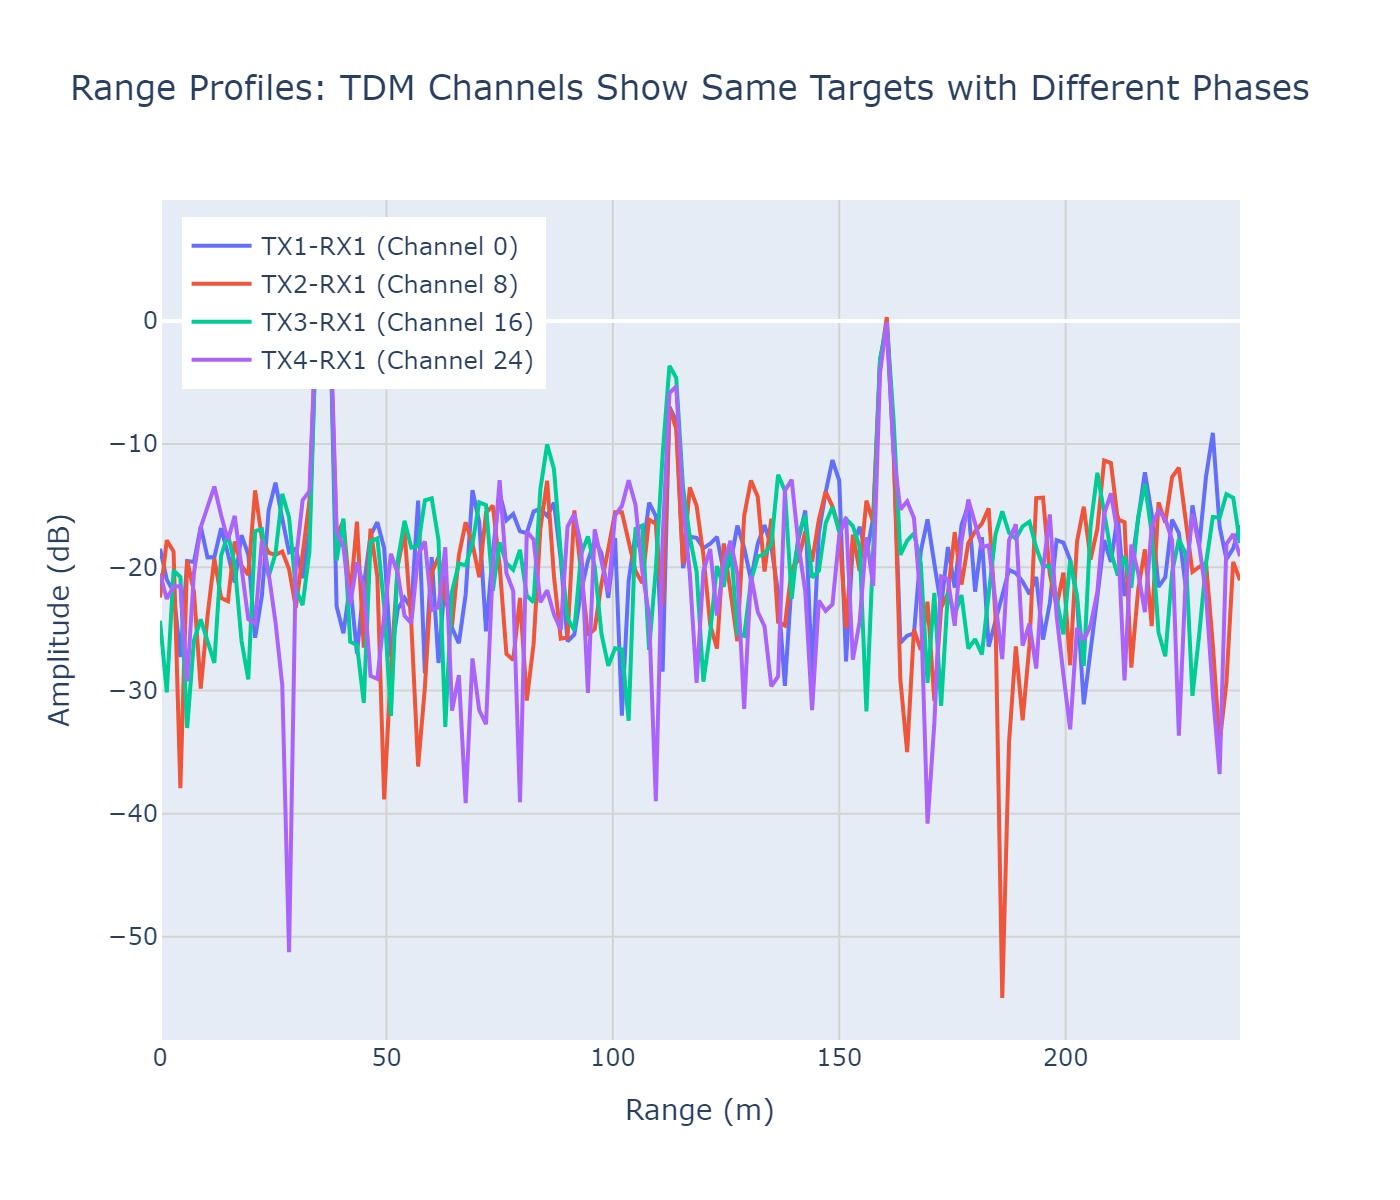

In [11]:
# Calculate maximum unambiguous range
max_range = (
    3e8                                                                      # Speed of light
    * radar.radar_prop["receiver"].bb_prop["fs"]                            # Sampling rate
    * radar.radar_prop["transmitter"].waveform_prop["pulse_length"]        # Chirp duration
    / radar.radar_prop["transmitter"].waveform_prop["bandwidth"]           # Chirp bandwidth
    / 2                                                                     # Two-way propagation
)

# Create range axis
range_axis = np.linspace(
    0, max_range, radar.sample_prop["samples_per_pulse"], endpoint=False
)

# Create figure for range profile comparison
fig = go.Figure()

# Plot range profile for first RX of each TX (channels 0, 8, 16, 24)
fig.add_trace(
    go.Scatter(
        x=range_axis,                                  # Range axis (m)
        y=20 * np.log10(np.abs(range_profile[0, 0, :])),   # Channel 0: TX1-RX1
        name="TX1-RX1 (Channel 0)",
        line=dict(width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=range_axis,
        y=20 * np.log10(np.abs(range_profile[8, 0, :])),   # Channel 8: TX2-RX1
        name="TX2-RX1 (Channel 8)",
        line=dict(width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=range_axis,
        y=20 * np.log10(np.abs(range_profile[16, 0, :])),  # Channel 16: TX3-RX1
        name="TX3-RX1 (Channel 16)",
        line=dict(width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=range_axis,
        y=20 * np.log10(np.abs(range_profile[24, 0, :])),  # Channel 24: TX4-RX1
        name="TX4-RX1 (Channel 24)",
        line=dict(width=2),
    )
)

# Configure plot layout
fig.update_layout(
    title="Range Profiles: TDM Channels Show Same Targets with Different Phases",
    xaxis=dict(title="Range (m)", gridcolor='lightgray'),
    yaxis=dict(title="Amplitude (dB)", gridcolor='lightgray'),
    height=600,
    legend=dict(x=0.02, y=0.98),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Digital Beamforming

Apply spatial processing across virtual array to extract target angles.

**Steering Vector Formation:**

For each azimuth angle $\theta$, create steering vector:

$$\vec{a}(\theta) = [e^{j2\pi d_1 \sin\theta/\lambda}, e^{j2\pi d_2 \sin\theta/\lambda}, ..., e^{j2\pi d_{32} \sin\theta/\lambda}]^T$$

Where $d_i$ is the Y-position of the $i$-th virtual element (from TX-RX combinations).

**Beamforming Matrix:**

Construct matrix $\mathbf{A}$ where each column is a steering vector for one angle:

$$\mathbf{A} = [\vec{a}(\theta_1), \vec{a}(\theta_2), ..., \vec{a}(\theta_{180})]$$

For $\theta$ from -90° to +89° in 1° steps.

**Windowing:**

Apply Chebyshev window (50 dB sidelobes) across virtual array to control angular sidelobes:

$$\vec{w} = \text{chebwin}(32, 50\text{ dB})$$

**Beamformer Output:**

$$\mathbf{Y} = \mathbf{A}^H (\mathbf{X} \odot \vec{w})$$

Where:
- $\mathbf{X}$ = Range profile matrix [32 channels × samples]
- $\odot$ = Element-wise multiplication (windowing)
- $\mathbf{Y}$ = Range-angle map [180 angles × samples]

In [12]:
### Digital Beamforming Processing ###

# Define azimuth angle array for beamforming: -90° to +89° in 1° steps
azimuth = np.arange(-90, 90, 1)  # 180 angles

### Extract Virtual Array Positions ###

# Get Y-positions of all 32 virtual elements (in wavelengths)
array_loc_x = np.zeros((1, len(radar.array_prop["virtual_array"])))
for va_idx, va in enumerate(radar.array_prop["virtual_array"]):
    # Convert position from meters to wavelengths for phase calculation
    array_loc_x[0, va_idx] = va[1] * 24.125e9 / 3e8  # Y-position in wavelengths

### Create Steering Matrix ###

# Create meshgrid for vectorized steering vector calculation
azimuth_grid, array_loc_grid = np.meshgrid(azimuth, array_loc_x)

# Calculate steering matrix A: [180 angles × 32 elements]
# Each column is exp(j*2π*d*sin(θ)/λ) for one angle
A = np.transpose(
    np.exp(1j * 2 * np.pi * array_loc_grid * np.sin(azimuth_grid / 180 * np.pi))
)

### Apply Spatial Window ###

# Chebyshev window across virtual array (50 dB sidelobe suppression)
bf_window = np.transpose(
    np.array([signal.windows.chebwin(len(radar.array_prop["virtual_array"]), at=50)])
)

### Perform Beamforming ###

# Apply window to range profiles, then beamform across angles
# AF = A^H * (range_profile * window)
# Output: [180 angles × samples (range bins)]
AF = np.matmul(
    A,  # Steering matrix [180 × 32]
    range_profile[:, 0, :]  # Range profiles [32 × samples]
    * np.repeat(bf_window, radar.sample_prop["samples_per_pulse"], axis=1),  # Windowed
)

print(f"\nDigital beamforming complete:")
print(f"  Beamforming output shape: {AF.shape}")
print(f"  Azimuth angles: {len(azimuth)}")
print(f"  Virtual array elements: {len(radar.array_prop['virtual_array'])}")
print(f"  Angular resolution: ~{57.3 * 3e8 / (24.125e9 * 16 * wavelength):.1f}°")


Digital beamforming complete:
  Beamforming output shape: (180, 160)
  Azimuth angles: 180
  Virtual array elements: 32
  Angular resolution: ~3.6°


### Visualize Range-Angle Map

Display 3D range-angle map showing target positions with high angular resolution.

**Interpretation:**

- **X-axis**: Range (m) → Distance from radar
- **Y-axis**: Azimuth (degrees) → Horizontal angle
- **Z-axis**: Amplitude (dB) → Detection strength
- **Peaks**: Three targets at their (range, angle) coordinates

**Expected Targets:**

1. **Target 1**: ~160m range, 0° azimuth (on-axis)
2. **Target 2**: ~113m range, -45° azimuth (left side)
3. **Target 3**: ~36m range, +34° azimuth (right side)

**TDM MIMO Advantage:**

The virtual array of 32 elements (from 4 TX × 8 RX) provides ~3-4° angular resolution, clearly separating targets that would be ambiguous with a single-TX system.

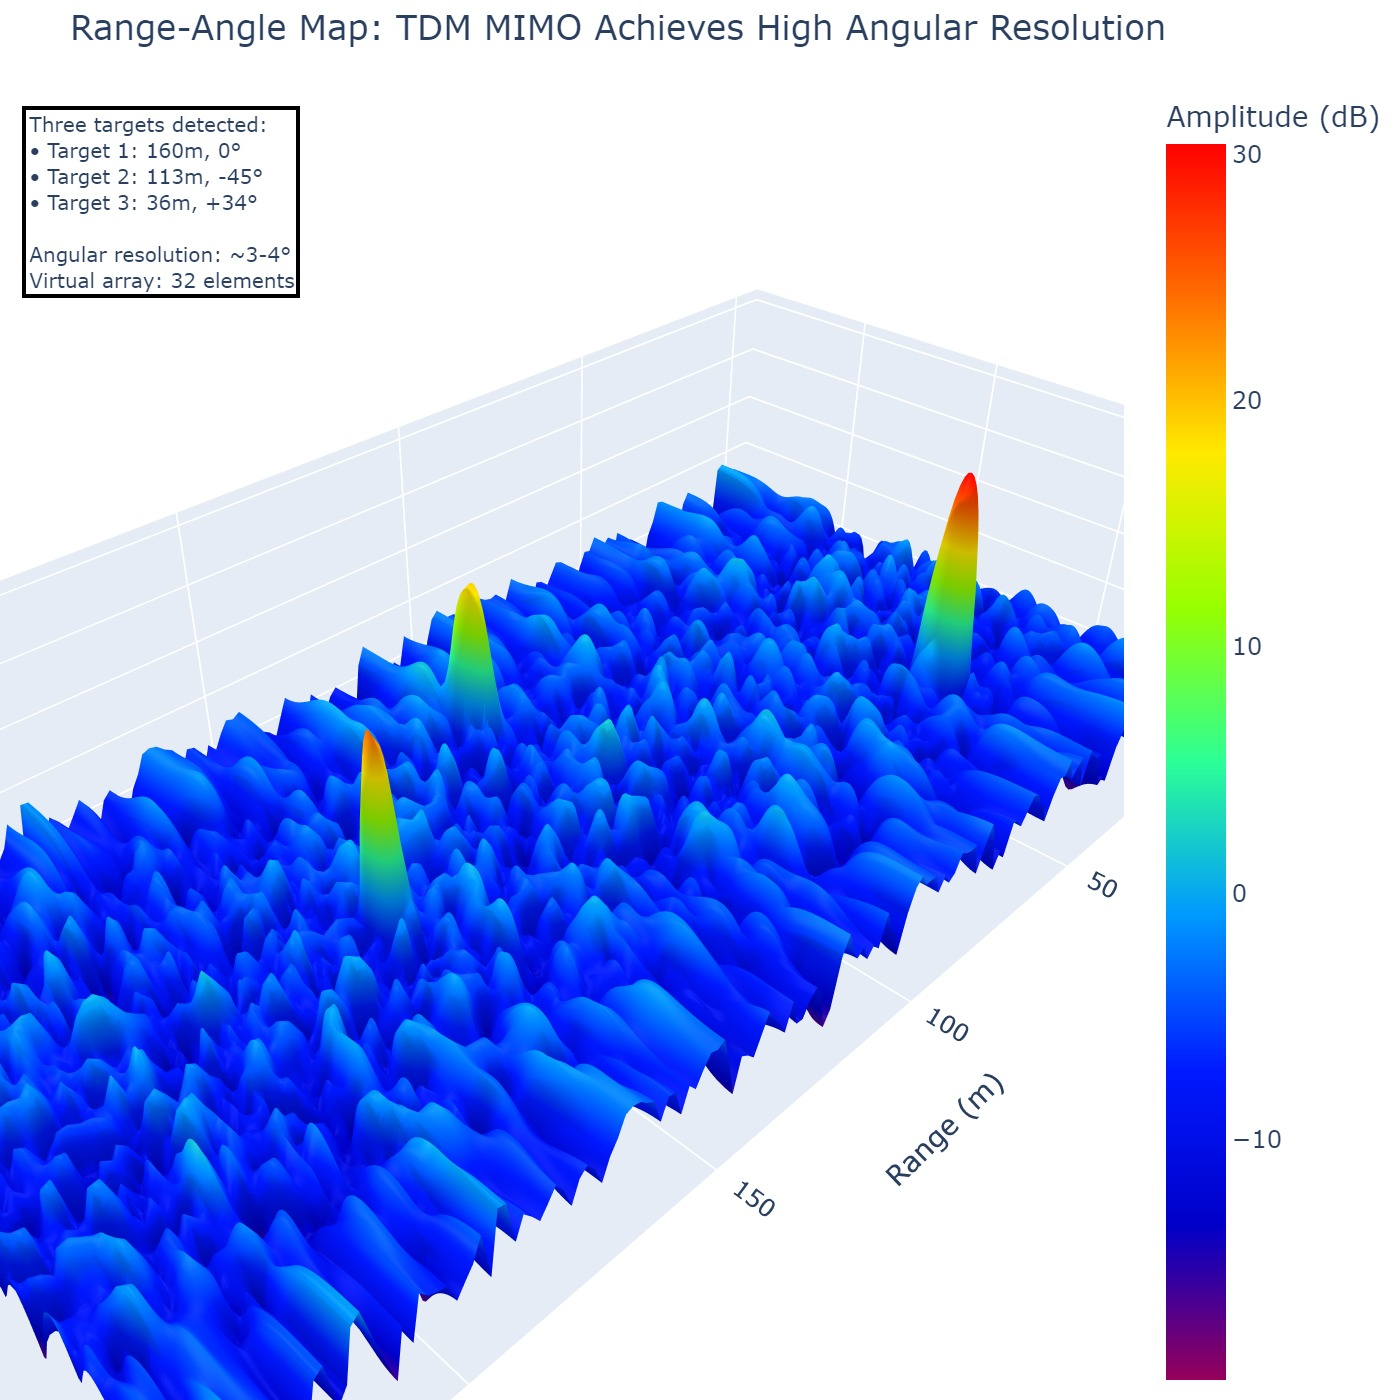

In [13]:
# Range axis (same as before)
range_axis = np.linspace(
    0, max_range, radar.sample_prop["samples_per_pulse"], endpoint=False
)

# Create 3D surface plot of range-angle map
fig = go.Figure()
fig.add_trace(
    go.Surface(
        x=range_axis,                              # Range axis (m)
        y=azimuth,                                 # Azimuth axis (degrees)
        z=20 * np.log10(np.abs(AF) + 0.1),        # Amplitude (dB), add small offset for log
        colorscale="Rainbow",                      # Color scheme
        colorbar=dict(title="Amplitude (dB)"),
    )
)

# Add annotations for expected target locations
annotations_text = (
    "Three targets detected:<br>"
    "• Target 1: 160m, 0°<br>"
    "• Target 2: 113m, -45°<br>"
    "• Target 3: 36m, +34°<br>"
    "<br>Angular resolution: ~3-4°<br>"
    "Virtual array: 32 elements"
)

fig.add_annotation(
    text=annotations_text,
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="black",
    borderwidth=2,
    align="left",
    font=dict(size=10),
)

# Configure 3D plot layout
fig.update_layout(
    title="Range-Angle Map: TDM MIMO Achieves High Angular Resolution",
    height=700,
    scene=dict(
        xaxis=dict(title="Range (m)"),
        yaxis=dict(title="Azimuth (degrees)"),
        zaxis=dict(title="Amplitude (dB)"),
        aspectmode="manual",
        aspectratio=dict(x=2, y=1, z=0.5),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Summary

In this notebook, you learned how to implement and analyze TDM MIMO FMCW radar using RadarSimPy:

### Key Takeaways

**1. TDM MIMO Principles**
- Understood virtual array formation: Nvirtual = NTX × NRX
- Learned time-division multiplexing via `delay` parameter
- Recognized 32 virtual elements from 12 physical (2.67× efficiency)
- Appreciated angular resolution improvement from virtual aperture

**2. Virtual Array Geometry**
- Configured TX array with wide spacing (2λ for large aperture)
- Configured RX array with dense spacing (λ/2 for uniform sampling)
- Calculated virtual element positions: vij = ti + rj
- Achieved ~16λ effective aperture length

**3. TDM Configuration**
- Set sequential TX delays: 0, 100, 200, 300 μs
- Ensured PRP accommodates all TX slots: 400 μs
- Transmitted 80 μs chirps in each time slot
- Maintained full TX power per slot (no splitting)

**4. FMCW Integration**
- Used 100 MHz chirp bandwidth (24.075-24.175 GHz)
- Applied range FFT to extract beat frequency
- Converted beat frequency to range: R = (fb·c·T)/(2B)
- Achieved range resolution from chirp bandwidth

**5. Digital Beamforming**
- Formed steering vectors for -90° to +89°
- Created 180×32 steering matrix
- Applied Chebyshev windowing (50 dB sidelobes)
- Performed matrix multiplication for angle extraction

**6. Angular Resolution**
- Achieved ~3-4° resolution from virtual aperture
- Calculated beamwidth: θ3dB ≈ λ/L
- Demonstrated 16λ effective aperture
- Compared to ~14° with single TX

**7. Target Detection**
- Detected three targets at different ranges and angles
- Separated targets by 34-79° (well above resolution)
- Generated range-angle map showing clear peaks
- Validated TDM MIMO performance

**8. Automotive Radar Relevance**
- Understood TDM MIMO as automotive standard
- Recognized hardware efficiency (fewer elements)
- Appreciated high-resolution angle estimation
- Applied to autonomous driving scenarios

### Experiment Further

Try modifying the parameters to explore different scenarios:

**1. Number of TX Elements**:
- Vary from 2, 3, 5, 8 TX channels
- Observe virtual array size: NTX × 8
- Test angular resolution improvement
- Understand TX scaling benefits

**2. Number of RX Elements**:
- Change to 4, 12, 16 RX channels
- Observe virtual array size: 4 × NRX
- Test aperture length impact
- Balance cost vs. performance

**3. TX Spacing**:
- Try λ, 3λ, 4λ spacing
- Observe aperture changes
- Test grating lobe appearance
- Optimize for specific FOV

**4. RX Spacing**:
- Try λ/4, λ, 2λ spacing
- Observe virtual array uniformity
- Test angular ambiguity
- Understand Nyquist spatial sampling

**5. TDM Time Slots**:
- Vary delay spacing: 50 μs, 200 μs
- Adjust PRP accordingly
- Test update rate trade-off
- Understand timing constraints

**6. Chirp Bandwidth**:
- Change to 50 MHz, 200 MHz, 500 MHz
- Observe range resolution: ΔR = c/(2B)
- Test range sidelobe levels
- Balance bandwidth allocation

**7. Target Angles**:
- Place targets closer in angle: 5°, 10°, 15° apart
- Test angular resolution limit (~3-4°)
- Observe sidelobe interference
- Define minimum resolvable angle

**8. Carrier Frequency**:
- Simulate at 77 GHz (automotive standard)
- Observe wavelength scaling: λ = c/f
- Test aperture in wavelengths
- Compare K-band vs. W-band

**9. Beamforming Windows**:
- Try uniform, Hamming, Taylor windows
- Compare sidelobe levels
- Observe mainlobe widening
- Trade resolution vs. sidelobes

**10. Doppler Processing**:
- Increase pulses to 128, 256
- Add Doppler FFT dimension
- Create range-Doppler-angle cube
- Detect moving targets

### Resources

- RadarSimPy Documentation: https://radarsimx.com
- RadarSimPy Processing Module: https://radarsimx.github.io/radarsimpy/processing.html
- TDM MIMO: Time-division multiplexing for virtual arrays
- Virtual Array: Effective aperture from TX-RX combinations
- Digital Beamforming: Spatial processing for angle estimation
- Steering Vectors: Phase relationships for angle synthesis
- Automotive Radar: 77 GHz MIMO for autonomous driving
- FMCW Processing: Range FFT and beat frequency
- Angular Resolution: Beamwidth and aperture relationships
- MIMO Multiplexing: TDM, FDM, CDM, DDM comparison